In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path

# import custom functions from src folder
module_path = str(Path.cwd() / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from robot import Robot

## The toy experiment
The ATLAS detector and the physics involved are insanely complicated. We will make our life easier by designing a toy project to explore ideas in a controlled environment.

### The problem
A scientist is faced with a strange challenge she has received from her eccentric colleague in the robotics-department. He has given her a big rectangular machine which she can not open. It is supplied with electricity and is mounted on a table. 

<p align="center">
  <img src="../fig/toy_experiment_fig1.png" height="250">
</p>

The interface of the machine is very simple:

- There is a quadratic screen on the machine. She can record any position on this screen by any means she wants.
- There are two big buttons which can light up. One is red and one is green. If she pushes one of the buttons, a blue dot appears on the screen in what appears to be a new location each time.

<p align="center">
  <img src="../fig/toy_experiment_machine.png" height="250">
</p>

- There is another button with the text ´simulate´. If she pushes this button one of the two colors light up and then a blue dot appears on the screen. This is repeated 100 times. If she pushes it again a new sequence appears.

<p align="center">
  <img src="../fig/toy_experiment_simulate.png" height="350">
</p>

Her eccentric friend has said that if she can make a good estimate of the probabilistic mathematical relationship $P(c|x_1, x_2)$ which is shown, she has won the first part of the challenge. He will test her solution by running a simulation, but hiding the colors so she only sees the coordinates and must predict the color. He has not specified exactly how he will grade her, but her predictions must not vary too much from the solution. He gives her a few hints:

- The relationship between the color and the coordinates is non-deterministic, but there is a logical relationship where coordinate implies color.
- Pressing the simulation-button produces output which are all drawn from the same distribution and is not ordered. Each run is exchangeable and each individual set of color-coordinate pairs is exchangeable.
- Pressing a color button gives us a way to decide the color and sample from the coordinate-distribution of that color.
- Inside the machine there is a **mechanistic** process which produces the output coordinates. The process **is explainable**.

As she is a scientist she believes that she should be able to at least figure _something_ out about this machine by exploring the statistical properties of the observed output.


### Reminder of probability rules:

Because of the intersectionality of this project, many concepts have to be explicitly defined to avoid confusion. I approach probability theory from the "objective-subjective" Bayesian viewpoint of Edwin Thompson Jaynes, a physicist who was dedicated to the study of statistics and foundational probability theory. Jaynes presents probability theory as an extension of logic in a clear and concise way which also aligns with the multitude of other methods of approaching the subject. He is especially vary of the asymptotical approach of taking a limit to infinity without careful consideration, and I try to do the same in my work. However, my work also draws inspiration from many other sources, especially the established frequentist approach to probability theory which dominates collider physics.

**Proposition**: a logical True/False statement such as "It is raining"

**Plausibility**: the degree of belief we have in that proposition being true. This degree of belief may vary from complete certainty in the statement being False, through complete uncertainty to complete certainty of the statement being True.

**Probability**: the mathematical representation of plausibility as a monotonically increasing function from 0 to 1, with 0 being complete certainty that the proposition is False, 0.5 complete uncertainty and 1 complete certainty in it being True. Probabilities are calculated using the sum and multiplication rule.

**Inference**: the calculations of probabilities related to a problem. The point of inference is to quantify our degree of belief in each proposition so we may make informed choices. Inference is not about finding the correct proposition. Problems that have one correct solution, which may be calculated fully, fall under the category of deductive problems. I believe most non-trivial problems are problems of inference. In any case, most problems scientists are interested in are problems of inference. Performing inference is often referred to as making predictions, although predictions also involve decision making.

#### The sum rule:

We assign probabilities such that all the propositions that describe the complete set of possible answers to a problem sum to 1 (complete certainty).

$1 = \sum P(A)$ over all possible A

If some propositions are equally likely, they are assigned the same numerical value. If all propositions are equally likely, their probability is $1/n$ with $n$ being the number of propositions in the complete set of possible propositions.


#### Implication and the multiplication rule

!! This section is still under development !!

In everyday speech, the word "implies" is often used differently from its dictionary definition. Most people know the difference, but may still be confused unless they are careful.

**implies:** suggests the possibility of, not necessarily leads to

Implication is therefore not the same as causation. Implication is not related to physical causality, it has to do with human reasoning and logic. I will illustrate the point with an example.

If A implies B, then the truth values of A and A and B are equal: $A = (A \text{ and } B)$. In words: if A implies B, then if A is true B must be true, and if B is false, then A must be false. Knowing that this connection exists influences our opinion about the truth values not immediately known. If B is true, we know that A may be true, and if A is false we know B might be false. For instance, it can not rain if there are no clouds, so the truth value of "are there clouds?" implies (suggests the possibility of) "it is raining". If we don't know if it will be raining or not, we can factor this into our calculations by looking for clouds in the sky and knowing that if there are clouds (or we think there will be clouds), then rain might appear. If the sky is completely without clouds we can safely assume there will be no rain in the near future. This is called inference. The possibility of clouds AND rain are a product of the possibility of rain if there are clouds that day (this might depend on factors like the local air pressure that day), and the possibility of clouds in the first place (might be dependent on the expected amount of wind). This is represented mathematically with the multiplication rule.

The multiplication rule (also known as Bayes rule):

$P(A,B) = P(A|B) \cdot P(B)$

$P(A|B)$ is referred to as the *conditional probability* of A given B

The sum rule with implication:

If we sum the probability of A and B over the complete set of possible propositions B related to our problem, we effectively include every possible way B may influence our degree of belief about A, and end up with our degree of belief about A regardless of B.

$P(A) = \sum P(A, B)$ over the complete set of possible B

$P(A)$ in this case is referred to as the *marginal probability* of A with respect to B

If B is binary, then:

$P(A) = P(A, B) + P(A, \bar{B})$

One or more of the B's may have the property that A will not happen when they are True. The probability P(A,B) of all those are zero, and so the "sum over all possible B" may be reduced to the sum over all B's that don't automatically render A impossible.

$P(A) = \sum P(A, B)$ over the complete set of possible B where A is not impossible

Combining both rules, we get:

$P(A) = \sum P(A, B) = \sum P(A|B)P(B)$, over the complete set of possible B where A is not impossible

#### Dependent or not?

Sometimes it may be uncertain if two propositions are related or not. We say that they are *independent* if knowing the Truth value of one does not affect our degree of belief about the Truth value of the other.

Independent propositions:

$P(A,B) = P(A|B) \cdot P(B)  = P(A) \cdot P(B) \rightarrow P(A|B) = P(A)$

Here the plausibility of A is not at all dependent on the value of B. The degree of certainty about B does not at all affect the degree of certainty about A.
There is no math to describe their relation, because there is no relation.

Completely dependent propositions:

$P(A|B) = P(B)$

$P(A,B) = P(A)$

Here A is completely dependent on B. Certainty about B gives us the same certainty about A.
If we know this is the case, we may search for the *functional relationship* between the two propositions.

Anything in between these two extremes is what probability theory covers.



### Back to the machine
For our experiment, we can use our knowledge about probability theory to set up some mathematical expressions. Let c stand for the color of the button that lights up, $x_1, x_2$ the 2D coordinates of the dot on the screen and $\text{event}_n$ is the n-th sample from the simulation.

$P(c) = \sum P(c, x_{1, i}, x_{2, i})$, with the sum being over all possible $(x_1, x_2)$ combinations.

$0 \leq P(c , x_1, x_2) \leq P(c) \leq 1$, for all possible coordinates regardless of color

$P(c = red|x_1, x_2) + P(c = green|x_1, x_2) = 1$, for all possible coordinates regardless of color

$P(c | event_n) = P(c | event_m)$ for every pair of samples $n, m$.

### First trial

It takes a long time for the scientist to manually record the results, and she has other things to do, so she wants to minimize the time she spends on this experiment. Still, she asks her master students to spend some hours collecting a fair amount of data. To get the probabilities she is looking for, she wants to use some kind of Bayesian population inference scheme. But these calculations take a long time, so she can't use all the data they gathered, and the uncertainties are large... The whole thing is a hassle, so she would like to figure out if machine learning can help her in this project.

### Does this even make sense?

This exact kind of problem is what many ML-experts are saying gradient descent driven predictive algorithms can solve for you. Many also say that you do not need any math or expert knowledge of the data you are trying to make predictions about, because their methods are so flexible and generalize easily to a multitude of applications.

In [3]:
# Create robot object
myRobot = Robot(seed=24)

In [4]:
# Custom plot function
def plot_data(df):

    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))

    max_x1 = max(abs(df["x1"].values))
    max_x2 = max(abs(df["x2"].values))

    df_red = df[df["color"] == "red"]
    sn.scatterplot(df_red, x="x1", y = "x2", c="red", alpha=0.1, ax=ax[0][0])
    sn.histplot(df_red, x="x1", color="red", ax=ax[0][1])
    sn.histplot(df_red, x="x2", color="red", ax=ax[0][2])
    
    df_green = df[df["color"] == "green"]
    sn.scatterplot(df_green, x="x1", y = "x2", c="green", alpha=0.1, ax=ax[1][0])
    sn.histplot(df_green, x="x1", color="green", ax=ax[1][1])
    sn.histplot(df_green, x="x2", color="green", ax=ax[1][2])
    
    for axis in ax:
        axis[0].set_xlim(-max_x1, max_x1)
        axis[0].set_ylim(-max_x2, max_x2)
        axis[1].set_xlim(-max_x1, max_x1)
        axis[2].set_xlim(-max_x2, max_x2)

    return fig, ax

### Output of the simulation

We will limit the number of simulation samples to 1000.
It is clear that there is some difference in the radial distribution of the data compared to the center of the screen, so it should be possible to make some separation, but probably not a perfect separation. The question now is how we should attack this problem. What do you think?

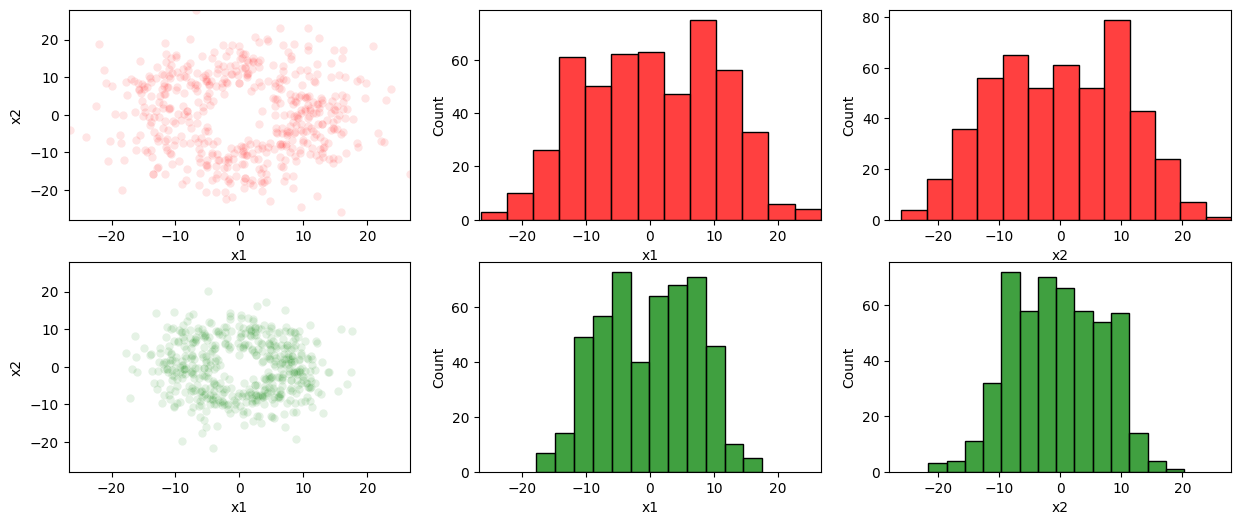

In [5]:
df_simulate = myRobot.simulate(n=1000, mode="mixed")
fig, ax = plot_data(df_simulate)